# Hands On Astropy Tutorial 
**Tutors:** Axel Donath and Johannes King

This hands-on tutorial gives an introduction and overview of the [Astropy](http://www.astropy.org/) Python package for astronomy.

![](astropy_banner_96.png)



## Preface
We recommend to follow this tutorial by **executing the code cells on your local machine**, along with the tutor. Every sub-topic we will cover in this tutorial will be concluded by a few **exercises with different levels of difficulty** (*easy*, *advanced* and *hard*). We will give you **~10-15 min to solve the exercises** and present a possible solution afterwards. In case we don't have time to show all the solutions or in the likely case that you don't manage to solve all of them: we will provide a **sample solution** for all exercises **after the course**.   

The estimated time for this tutorial is ~2 hours. Feel free to **interrupt at any time** to ask questions or **talk to the assisting tutors** when you encounter errors or the code doesn't work as expected.


We're happy to receive any feedback or questions on the tutorial via mail to *axel.donath@mpi-hd.mpg.de* or using the 
repository's [issue tracker](https://github.com/Asterics2020-Obelics/School2017/issues). 


## Overview

The material presented here is partly based on: 

- Astropy [documentation](http://docs.astropy.org/en/stable/index.html) webpage
- Notebooks provided in the [Astropy Tutorials](https://github.com/astropy/astropy-tutorials) repository
- And the [Astropy Introduction for Gammapy Users](https://github.com/gammapy/gammapy-extra/blob/master/notebooks/astropy_introduction.ipynb) notebook

As the content that can be covered in this ~2 hours tutorial is very limited, we recommend to also **check-out these ressources** listed above after the school.

The **Astropy package is structured into several submodules** and we will cover (what we consider) the most important of them in the following order:

- [astropy.units](http://docs.astropy.org/en/stable/units/index.html) and in particular [astropy.units.Quantities](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html) to do astronomical calculations with units.

- [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) and in particular the classes [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) and [Angle](http://docs.astropy.org/en/stable/coordinates/angles.html) to handle astronomical sky positions, coordinate systems and coordinate transformations.

- [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html) to open and write data files in [FITS format](https://fits.gsfc.nasa.gov/fits_documentation.html).

- [astropy.tables](http://docs.astropy.org/en/stable/table/index.html) and [Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html) class to handle astronomical data tables.

- (optional) Plotting of astronomical sky images with [astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/)
- (optional) Define regions in the sky with the [region](http://astropy-regions.readthedocs.io/en/latest/getting_started.html) package
- (optional) manipulate [Times and Dates](http://docs.astropy.org/en/stable/time/index.html)



## What is Astropy?


    "The Astropy Project is a community effort to develop a single core package for Astronomy in Python and foster     interoperability between Python astronomy packages."


Some useful links:
- [Astropy paper](http://adsabs.harvard.edu/abs/2013A%26A...558A..33A)
- [Astropy mailing list](https://mail.scipy.org/mailman/listinfo/astropy)
- [Astropy gitter channel](https://gitter.im/astropy/astropy)


In addition to the Astropy core package there is an infrastructure of  [Astropy affiliated packages](http://www.astropy.org/affiliated/) dedicated to specific fields of Astronomy or analysis tasks:




Let's start with the setup and check of the notebook:

## 0. Setup

So that we can work with the notebook we start with the setup:

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [2]:
# All examples should work with Astropy > 1.3 and Numpy > 1.11
import numpy as np
import astropy
print('numpy:', np.__version__)
print('astropy:', astropy.__version__)

numpy: 1.11.2
astropy: 1.3.2


## 1. Units and Quantities

The [astropy.units]() subpackage provides functions and classes to handle physical quantities with units. 

### 1.1. Basics
The recommended way to import the `astropy.units` submodule is: 

In [3]:
from astropy import units as u

`Quantities` are created by multiplying any number, list or array with a unit object:

In [4]:
distance = 1. * u.lightyear
print(distance)

1.0 lyr


Where a lot of builtin units are availabe as attributes on the `u` object, you can check using tab completion on `u.<TAB>`.

Quantities can be also created using lists and arrays:

In [5]:
distances = [1, 3, 10] * u.lightyear
print(distances)

distances = np.array([1, 3, 10]) * u.lightyear
print(distances)

[  1.   3.  10.] lyr
[  1.   3.  10.] lyr


The quantity object has a value attribute, which is a plain `numpy.ndarray`:

In [6]:
distances.value
type(distances.value)

numpy.ndarray

And a unit, which is represented by a `astropy.units.core.Unit` object:

In [7]:
distance.unit
type(distances.unit)

astropy.units.core.Unit

A quantity behaves in many ways just like a `numpy.ndarray` with an attached unit.

Probably the most useful method on the `Quantity` object is the `.to()` method which allows to convert a quantity to different units:

In [8]:
distance.to('meter')

<Quantity 9460730472580800.0 m>

In [9]:
distance.to(u.parsec)

<Quantity 0.3066013937879527 pc>

Quantities can be combined with any arithmetical expression to derive other quantities and `astropy.units` will propagate
the units correctly:

In [10]:
speed_of_light = distance / u.year
print(speed_of_light.to('km/s'))

299792.458 km / s


In [11]:
print(speed_of_light.to('angstrom/day'))

2.5902068371199996e+23 Angstrom / d


If a unit conversion is not possible an `UnitConversionError` will be raised:

In [12]:
speed_of_light.to('kg/s')

UnitConversionError: 'lyr / yr' (speed) and 'kg / s' are not convertible

For standardized unit systems such as 'si' or 'cgs' there are convenience attributes on the quantity object:

In [13]:
speed_of_light.si

<Quantity 299792458.0 m / s>

In [14]:
speed_of_light.cgs

<Quantity 29979245799.999992 cm / s>

### 1.2. Equivalencies

### 1.3 Constants

Astropy provides a lot of builtin physical and astronomical constants quantitites in the [astropy.constants]() submodule:

In [15]:
from astropy import constants as const

print(const.c.to('km / s'))

299792.458 km / s


Here is a [list of available constants](http://docs.astropy.org/en/stable/constants/#module-astropy.constants).

### 1.4  Interfacing with "no quantity aware" code

When writing code that uses quantities we are typically bound to use it everywhere in the code. But often we'd like to interface with functions (e.g. from scipy or matplotlib) or other third-party code that doesn't know how to handle quantities.

For matplotlib Astropy has a builtin support:

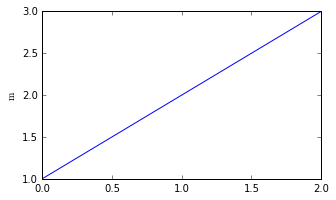

In [16]:
from astropy.visualization import quantity_support

with quantity_support():
    plt.figure(figsize=(5, 3))
    plt.plot([1, 2, 3] * u.m)

But in other cases there is only the option to convert the quantity to well defined units, strip off the unit and re-attach it after the computation:

In [17]:
emin, emax = [1, 10] * u.TeV
energies = np.logspace(np.log10(emin.value), np.log10(emax.value), 10) * emin.unit
print(energies)

[  1.           1.29154967   1.66810054   2.15443469   2.7825594
   3.59381366   4.64158883   5.9948425    7.74263683  10.        ] TeV


Another example using `convolve`:

In [18]:
def smooth_gaussian(data, gaussian):
    unit = data.unit
    
    
    return smoothed * unit

### 1.X Exercises

- (*easy*) 
- (*advanced*) Define a new unit called `"baro-meter"`, which is eqivalent to 25 cm and use it to measure the height of the empire state building (for other ways to measure the height of a building using a barometer see [barometer question on Wikipedia](https://en.wikipedia.org/wiki/Barometer_question)...)
- (*expert*) 

## 2. Coordinates

With the submodule [astropy.coordinates]() Astropy provides a framework to handle sky positions in various coordinate systems and transformations between them.


### 2.1 Basics
The basic class to handle sky coordinates is [SkyCoord]():

In [19]:
from astropy.coordinates import SkyCoord

It can be created by passing a position angle for longitude and latitude and a keyword specifying a coordinate frame:

In [20]:
position_crab = SkyCoord(83.63 * u.deg,  22.01 * u.deg, frame='icrs')
print(position_crab)

<SkyCoord (ICRS): (ra, dec) in deg
    ( 83.63,  22.01)>


Alternatively the angles can be specified as string:

In [21]:
position_crab = SkyCoord('5h34m31.97s', '22d0m52.10s', frame='icrs')

# or

position_crab = SkyCoord('5:34:31.97', '22:0:52.10', unit=(u.hour, u.deg), frame='icrs')

A very convenient way to get the coordinates of an individual object is qerying the [Sesame](http://cds.u-strasbg.fr/cgi-bin/Sesame) database with `SkyCoord.from_name()`:

In [22]:
SkyCoord.from_name('Crab')


<SkyCoord (ICRS): (ra, dec) in deg
    ( 83.6332124,  22.0144601)>

To transform the coordinates to a different coordinate system we can use `SkyCoord.transform_to()`:

In [23]:
position_crab.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    ( 184.55754381, -5.78427369)>

For convenience we can also directly use the `.galactic` or `.icrs` attributes:

In [28]:
position_crab.galactic

<SkyCoord (Galactic): (l, b) in deg
    ( 184.55754381, -5.78427369)>

In [29]:
position_crab.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    ( 83.63320833,  22.01447222)>

To access the `longitude` and `latitude` angles individually: 

In [33]:
position_crab.data.lon


<Longitude 5.575547222222222 hourangle>

In [31]:
position_crab.data.lat

<Latitude 22.01447222222222 deg>

### 1.2 ALT - AZ coordinates

# 2. Exercises

- (*easy*) Find the 
- (*advanced*)
- (*expert*)

# 3. FITS Images and WCS

The [flexible image transport system](https://fits.gsfc.nasa.gov/fits_documentation.html) format (FITS) is widely used data format for astronomical images and tables. As example we will use image data of the supernova remnant [Cassiopeia A](https://en.wikipedia.org/wiki/Cassiopeia_A), taken by the [Chandra X-ray observatory](http://chandra.harvard.edu/).



In [35]:
from astropy.io import fits

To open the fits file we use `fits.open()`:

In [75]:
hdulist = fits.open('data/casa_0.5-1.5keV.fits.gz')

And retrieve some basic information by calling `.info()`:

In [76]:
hdulist.info()

Filename: data/casa_0.5-1.5keV.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      26   (1024, 1024)   float32   


In [77]:
image_hdu = hdulist['PRIMARY']

In [78]:
image_hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis Length                                    
NAXIS2  =                 1024 / Axis Length                                    
OBJECT  = 'Cassiopeia A'                                                        
DATE-OBS= '2007-12-05T22:01:59'                                                 
DATE-END= '2007-12-08T20:07:24'                                                 
LTM1_1  =                    1                                                  
LTM1_2  =                    0                                                  
LTM2_1  =                    0                                                  
LTM2_2  =                    1                                                  
LTV1    =                -36

In [79]:
image_hdu.data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

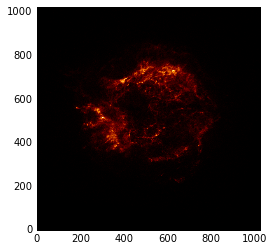

In [80]:
plt.imshow(image_hdu.data, origin='lower', cmap='afmhot')

In [62]:
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel, pixel_to_skycoord

In [61]:
wcs = WCS(image_hdu.header)

In [67]:
pixel_to_skycoord(10, 10, wcs)

<SkyCoord (ICRS): (ra, dec) in deg
    ( 350.99856802,  58.74321775)>

# Exercises

- (*easy*) 
- (*advanced*) Sum up all the data within a circle of X deg around the position of. You can use [np.indices()]() you can get arrays of x and y pixel positions 
    
- (*hard*) Find the sky position of the brightest pixel in the data. You can use e.g. [np.argmax()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

## 4. Tables

In [82]:
from astropy.table import Table

In [85]:
table = Table.read('data/preliminary_detlist.fits.gz')

In [87]:
from gammapy.image import SkyImage

image = SkyImage.read('data/casa_0.5-1.5keV.fits.gz')

In [89]:
pos = SkyCoord(table['RA'], table['DEC'], frame='icrs')

In [94]:
table[selection].write('data/catalog.fits')

# Exercises

- (*easy*)
- (*advanced*)
- (*expert*)

## 5. Plotting of sky images

# Exercises

- (*easy*)
- (*advanced*) Make a combined RGB image of the Chandra data in different energy bands. You can use e.g. [make_lupton_rgb](http://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html#astropy.visualization.make_lupton_rgb)
- (*expert*) 

## Acknowledgements

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).